In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/auto.csv')
df=df.replace(-1,np.nan)

Target column is imbalanced. 0 and 1 is of proportion 96.3552 : 3.64475

In [0]:
print(df['target'].value_counts())
print('0 records percentage is ',df['target'].value_counts()[0]/len(df) * 100 , ',','1 records percentage is ',df['target'].value_counts()[1]/len(df) * 100)

0    573518
1     21694
Name: target, dtype: int64
0 records percentage is  96.3552482140817 , 1 records percentage is  3.6447517859182947


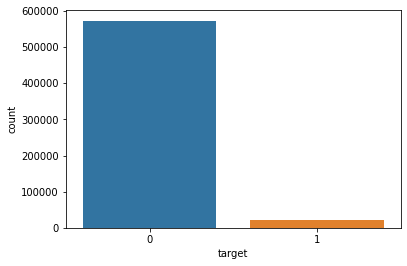

In [0]:
sns.countplot(x ='target', data = df)

There are 12 categorical columns in the dataset

In [0]:
cat_cols=['ps_ind_02_cat','ps_ind_04_cat','ps_ind_05_cat','ps_car_01_cat','ps_car_01_cat','ps_car_02_cat','ps_car_04_cat','ps_car_05_cat','ps_car_06_cat','ps_car_07_cat','ps_car_08_cat','ps_car_10_cat']
len(cat_cols)

12

There are 17 binary columns

In [0]:
bin_cols=['ps_ind_06_bin','ps_ind_07_bin','ps_ind_08_bin','ps_ind_09_bin','ps_ind_10_bin','ps_ind_11_bin','ps_ind_12_bin','ps_ind_13_bin','ps_ind_16_bin','ps_ind_17_bin','ps_ind_18_bin','ps_calc_15_bin','ps_calc_16_bin','ps_calc_17_bin','ps_calc_18_bin','ps_calc_19_bin','ps_calc_20_bin']
len(bin_cols)

17

Inferences from data on interval variables :

There are total 26 interval variables

ps_reg_03 ,ps_car_11,ps_car_12,ps_car_14 variables have missing data.

Below variables are having high correlation :

ps_car_13 and ps_car_12 

ps_car_14  and ps_car_12

ps_reg_01 and ps_reg_02

ps_reg_03 and ps_reg_02



Inferences from data on Ordinal variables :

Below variables have missing data :

ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_05_cat,ps_car_07_cat,ps_car_09_cat


Inferences from data on binary variables :

ps_ind_10_bin , ps_ind_11_bin ,ps_ind_12_bin, ps_ind_13_bin and ps_ind_14 have low variance

 There are no binary columns with missing values.

The top two features in missing values :

ps_car_03_cat,ps_car_05_cat  

In [0]:
print('missing values percentage',(df['ps_car_03_cat'].isnull().sum()/len(df)) * 100)
print('missing values percentage',(df['ps_car_05_cat'].isnull().sum()/len(df)) * 100)

missing values percentage 69.08983689844963
missing values percentage 44.78253126617071


In [0]:
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.4]]
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")

ps_car_03_cat, 

In [0]:
missing_value_cols=[]
for c in df2.columns:
  if (df2[c].count() != len(df)):
    missing_value_cols.append(c)
missing_value_cols

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_reg_03',
 'ps_car_01_cat',
 'ps_car_05_cat',
 'ps_car_07_cat',
 'ps_car_09_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_14']

In [0]:
for col in missing_value_cols:
  print(col)
  print('\n')
  print(df2[col].value_counts())
  print(df2[col].isnull().sum())
  print('missing values percentage',(df2[col].isnull().sum()/len(df)) * 100)
  print('*********')

ps_ind_02_cat


1.0    431859
2.0    123573
3.0     28186
4.0     11378
Name: ps_ind_02_cat, dtype: int64
216
missing values percentage 0.036289590935666624
*********
ps_ind_04_cat


0.0    346965
1.0    248164
Name: ps_ind_04_cat, dtype: int64
83
missing values percentage 0.013944611331760785
*********
ps_ind_05_cat


0.0    528009
6.0     20662
4.0     18344
1.0      8322
3.0      8233
2.0      4184
5.0      1649
Name: ps_ind_05_cat, dtype: int64
5809
missing values percentage 0.975954785857812
*********
ps_reg_03


0.633936    664
0.602599    637
0.704894    627
0.587899    616
0.680074    598
           ... 
0.282843      1
1.967073      1
1.676492      1
1.715736      1
1.578369      1
Name: ps_reg_03, Length: 5012, dtype: int64
107772
missing values percentage 18.106489788512327
*********
ps_car_01_cat


11.0    207573
7.0     179247
6.0      62393
10.0     50087
4.0      26174
9.0      20323
5.0      18142
8.0      15093
3.0       6658
0.0       5904
2.0       2144
1.0       136

Handling Missing data variables :

For a categorical column if the missing value percentage is negligible then the mode of the variable can be used to fill the missing data.
For example ps_ind_02_cat variable's  missing values percentage is 0.0362, in this case it can be filled with mode which is 0.0

In [0]:
df2['ps_ind_02_cat'] = df2['ps_ind_02_cat'].fillna(df2['ps_ind_02_cat'].mode())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


For a categorical columns like ps_ind_05_cat , missing values count is 5809 which is higher than  few categorical values like 2.0 and 5.0.

So in this scenario it is preferable to add missing values as another category with 7.0 as value

In [0]:
print(df2['ps_ind_05_cat'].isnull().sum())
print(df2['ps_ind_05_cat'].value_counts())

5809
0.0    528009
6.0     20662
4.0     18344
1.0      8322
3.0      8233
2.0      4184
5.0      1649
Name: ps_ind_05_cat, dtype: int64


In [0]:
df2['ps_ind_05_cat']=df2['ps_ind_05_cat'].fillna(7.0)
df2['ps_car_05_cat']=df2['ps_car_05_cat'].fillna(2.0) # Added as separate category as 44% of missing data is present

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
df2['ps_car_05_cat'].isnull().sum() # Added as separate category as 44% of missing data is present

0

For a continuous column like ps_reg_03 , missing values can be filled with mean value , after which the mean , std still remains the same or very less variance.

In [0]:
df2['ps_reg_03'].describe()

count    487440.000000
mean          0.894047
std           0.345413
min           0.061237
25%           0.633443
50%           0.801561
75%           1.083974
max           4.037945
Name: ps_reg_03, dtype: float64

In [0]:
df2['ps_reg_03']=df2['ps_reg_03'].fillna(df2['ps_reg_03'].mean())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
df2['ps_reg_03'].describe()

count    595212.000000
mean          0.894047
std           0.312581
min           0.061237
25%           0.666615
50%           0.894047
75%           1.000000
max           4.037945
Name: ps_reg_03, dtype: float64

In [0]:
 # For the below categorical values , added the mode value instead of calling mode() just to have clarity on what number being added.
df2['ps_ind_02_cat'] = df2['ps_ind_02_cat'].fillna(1.0)
df2['ps_ind_04_cat']=df2['ps_ind_04_cat'].fillna(0.0)
df2['ps_car_01_cat']=df2['ps_car_01_cat'].fillna(11.0)
df2['ps_car_07_cat']=df2['ps_car_07_cat'].fillna(1.0)
df2['ps_car_09_cat']=df2['ps_car_09_cat'].fillna(2.0)
df2['ps_car_11']=df2['ps_car_11'].fillna(3.0)
df2['ps_car_12']=df2['ps_car_12'].fillna(df2['ps_car_12'].mean())
df2['ps_car_14']=df2['ps_car_14'].fillna(df2['ps_car_14'].mean())


Correlation :
Below interval variables have high correlation. 

ps_car_13 , ps_car_12 ,ps_car_14 have high correlation. So any two variables can be dropped.

ps_reg_01 , ps_reg_02, ps_reg_03 have high correlation. So any two variables can be dropped.

In [0]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr

In [0]:
df_corr=['ps_calc_11','ps_calc_12','ps_calc_13','ps_calc_14','ps_car_13','ps_car_14','ps_calc_01','ps_calc_02','ps_calc_03','ps_calc_04','ps_calc_05','ps_calc_06','ps_calc_07','ps_calc_08','ps_calc_09','ps_calc_10','ps_ind_01','ps_ind_03','ps_ind_14','ps_ind_15','ps_reg_01','ps_reg_02','ps_reg_03','ps_car_11','ps_car_12']
for col in df_corr:
  #print(col)
  for col_j in df_corr2:
    if(col != col_j):
      corr,_=spearmanr(df2[col],df2[col_j])
      if(corr > 0.5):
        print(col,',',col_j,',',corr)
 

ps_car_13 , ps_car_12 , 0.6632750994325141
ps_car_14 , ps_car_12 , 0.5379956793198201
ps_reg_01 , ps_reg_02 , 0.5372687943775057
ps_reg_02 , ps_reg_01 , 0.5372687943775059
ps_reg_02 , ps_reg_03 , 0.5559923067277589
ps_reg_03 , ps_reg_02 , 0.5559923067277589
ps_car_12 , ps_car_13 , 0.6632750994325141
ps_car_12 , ps_car_14 , 0.5379956793198201


Correlation cannot be calculated on Ordinal Variables. usually correlation value will be nan.

In [0]:
cat_cols=['ps_ind_02_cat','ps_ind_04_cat','ps_ind_05_cat','ps_car_01_cat','ps_car_01_cat','ps_car_02_cat','ps_car_04_cat','ps_car_05_cat','ps_car_06_cat','ps_car_07_cat','ps_car_08_cat','ps_car_10_cat']

In [0]:
cat_cols2=cat_cols.copy()

In [0]:
for col in cat_cols:
  
  for col_j in cat_cols2:
    corr,_=spearmanr(df[col],df[col_j])
    print(col,',',col_j,',',corr)
    #if(corr > 0.5):
      #print(col,',',col_j,',',corr)
      


In [0]:
from sklearn.preprocessing import OneHotEncoder

In [0]:
onehotencoder=OneHotEncoder(sparse=False)

In [0]:
dataencoded=onehotencoder.fit_transform(df2[cat_cols])

In [0]:
cat_encoded=pd.DataFrame(dataencoded)

In [0]:
cat_encoded.columns=onehotencoder.get_feature_names(cat_cols)

In [0]:
df2.drop(cat_cols,inplace=True,axis=1)

In [0]:
df2=pd.concat([df2,cat_encoded],axis=1)

Scaling :
Columns that need to be scaled are below :

 ps_ind_01 , ps_ind_02_cat ,ps_ind_03,ps_ind_05,ps_ind_15,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_09_cat,ps_car_10_cat, ps_car_11_cat,ps_car_11, ps_car_15, ps_calc_04, ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14

In [0]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [0]:
rescale_cols=['ps_ind_01' , 'ps_ind_02_cat' ,'ps_ind_03','ps_ind_15','ps_car_01_cat','ps_car_02_cat','ps_car_04_cat','ps_car_06_cat','ps_car_09_cat','ps_car_10_cat', 'ps_car_11_cat','ps_car_11', 'ps_car_15', 'ps_calc_04', 'ps_calc_05','ps_calc_06','ps_calc_07','ps_calc_08','ps_calc_09','ps_calc_10','ps_calc_11','ps_calc_12','ps_calc_13','ps_calc_14']
scaled_Data=scaler.fit_transform(df[rescale_cols])

In [0]:
df_scaled=pd.DataFrame(scaled_Data,columns=rescale_cols)
df.drop(rescale_cols,axis=1,inplace=True)
df_final=pd.concat([df,df_scaled],axis=1)